In [73]:
# Step 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Put your inline CSV text into a Python string (copy-paste exactly what you shared)
csv_text = """Month,Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119
1949-11,104
1949-12,118
1950-01,115
1950-02,126
1950-03,141
1950-04,135
1950-05,125
1950-06,149
1950-07,170
1950-08,170
1950-09,158
1950-10,133
1950-11,114
1950-12,140
1951-01,145
1951-02,150
1951-03,178
1951-04,163
1951-05,172
1951-06,178
1951-07,199
1951-08,199
1951-09,184
1951-10,162
1951-11,146
1951-12,166
1952-01,171
1952-02,180
1952-03,193
1952-04,181
1952-05,183
1952-06,218
1952-07,230
1952-08,242
1952-09,209
1952-10,191
1952-11,172
1952-12,194
1953-01,196
1953-02,196
1953-03,236
1953-04,235
1953-05,229
1953-06,243
1953-07,264
1953-08,272
1953-09,237
1953-10,211
1953-11,180
1953-12,201
1954-01,204
1954-02,188
1954-03,235
1954-04,227
1954-05,234
1954-06,264
1954-07,302
1954-08,293
1954-09,259
1954-10,229
1954-11,203
1954-12,229
1955-01,242
1955-02,233
1955-03,267
1955-04,269
1955-05,270
1955-06,315
1955-07,364
1955-08,347
1955-09,312
1955-10,274
1955-11,237
1955-12,278
1956-01,284
1956-02,277
1956-03,317
1956-04,313
1956-05,318
1956-06,374
1956-07,413
1956-08,405
1956-09,355
1956-10,306
1956-11,271
1956-12,306
1957-01,315
1957-02,301
1957-03,356
1957-04,348
1957-05,355
1957-06,422
1957-07,465
1957-08,467
1957-09,404
1957-10,347
1957-11,305
1957-12,336
1958-01,340
1958-02,318
1958-03,362
1958-04,348
1958-05,363
1958-06,435
1958-07,491
1958-08,505
1958-09,404
1958-10,359
1958-11,310
1958-12,337
1959-01,360
1959-02,342
1959-03,406
1959-04,396
1959-05,420
1959-06,472
1959-07,548
1959-08,559
1959-09,463
1959-10,407
1959-11,362
1959-12,405
1960-01,417
1960-02,391
1960-03,419
1960-04,461
1960-05,472
1960-06,535
1960-07,622
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432
"""

# Step 2: Read from the string into a DataFrame
df = pd.read_csv(StringIO(csv_text), parse_dates=['Month'])
df = df.set_index('Month').asfreq('MS')  # Ensure monthly start frequency
print("Data Head:\n", df.head())
print("Shape:", df.shape)
print("Date range:", df.index.min(), "to", df.index.max())


Data Head:
             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
Shape: (144, 1)
Date range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00


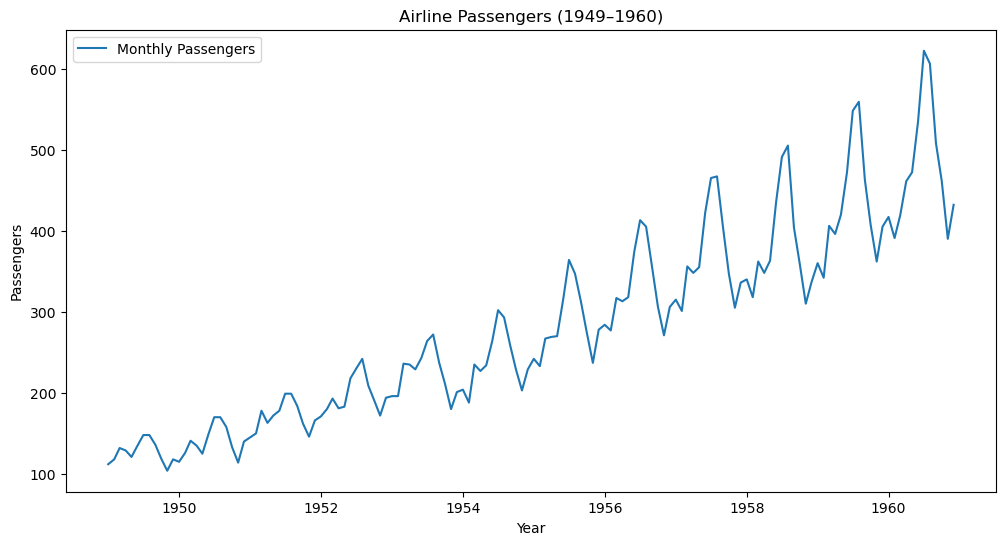

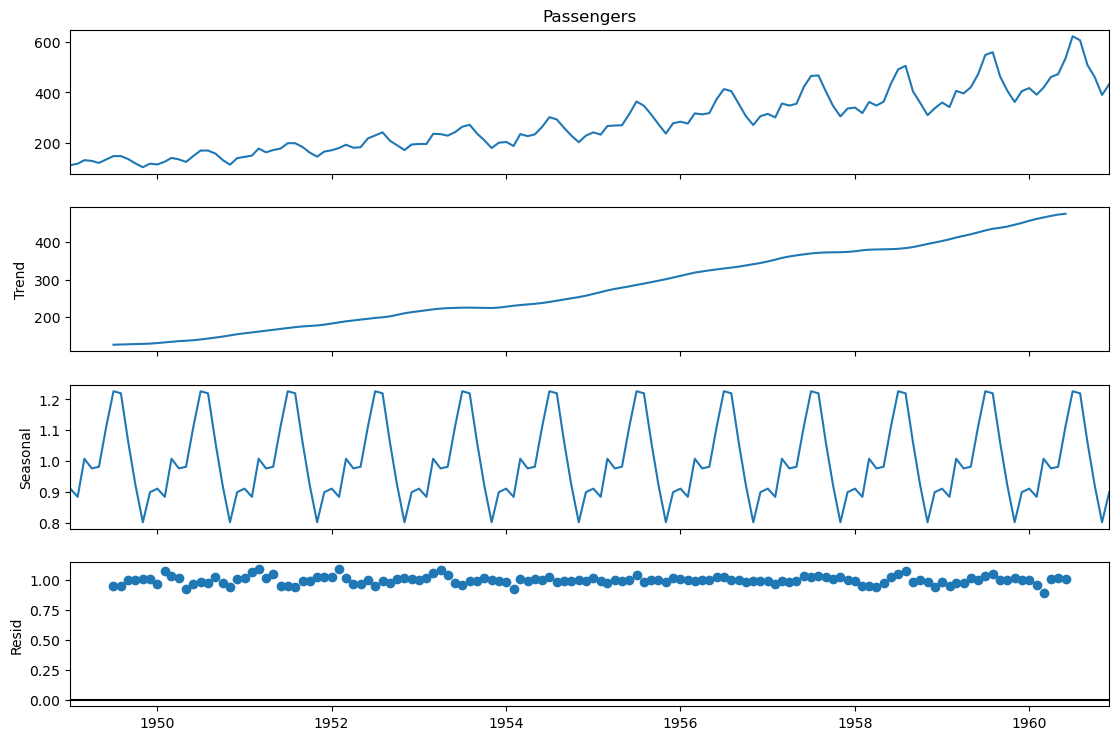

In [74]:
# Step 3: Plot the raw time series
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Passengers'], label='Monthly Passengers')
plt.title("Airline Passengers (1949–1960)")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# Step 4: Seasonal decomposition (multiplicative model)
decomp = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
fig = decomp.plot()
fig.set_size_inches(12, 8)
plt.show()


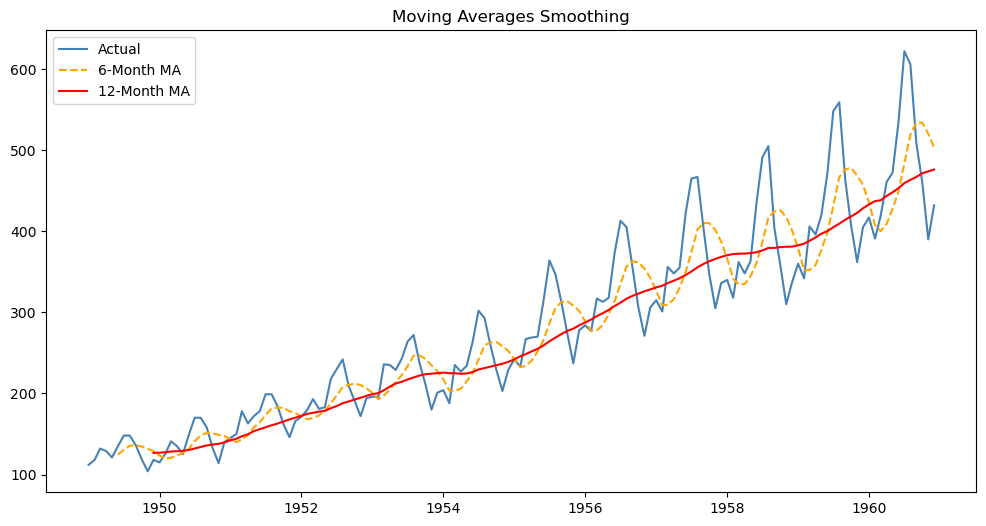

In [75]:
# Step 5: Moving averages (6-month and 12-month)
df['MA_6'] = df['Passengers'].rolling(window=6).mean()
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Actual', color='steelblue')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--', color='orange')
plt.plot(df['MA_12'], label='12-Month MA', color='red')
plt.title("Moving Averages Smoothing")
plt.legend()
plt.show()


In [76]:
# Split data into train and test
train = df.iloc[:-12]   # all rows except last 12 months
test  = df.iloc[-12:]   # last 12 months for testing

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (132, 3)
Test shape: (12, 3)


In [77]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the model
model = ARIMA(train['Passengers'], order=(1,1,1), seasonal_order=(0,1,1,12))
result = model.fit()

# Forecast next 12 months
forecast = result.forecast(steps=12)

# Evaluate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse:.1f} passengers")


RMSE: 22.4 passengers


In [78]:
result = model.fit()
print(result.summary())


                                    SARIMAX Results                                     
Dep. Variable:                       Passengers   No. Observations:                  132
Model:             ARIMA(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -447.111
Date:                          Sun, 28 Dec 2025   AIC                            902.221
Time:                                  11:17:22   BIC                            913.338
Sample:                              01-01-1949   HQIC                           906.735
                                   - 12-01-1959                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5385      0.330     -1.632      0.103      -1.185       0.108
ma.L1          0.3248      0.357      0.909      0.

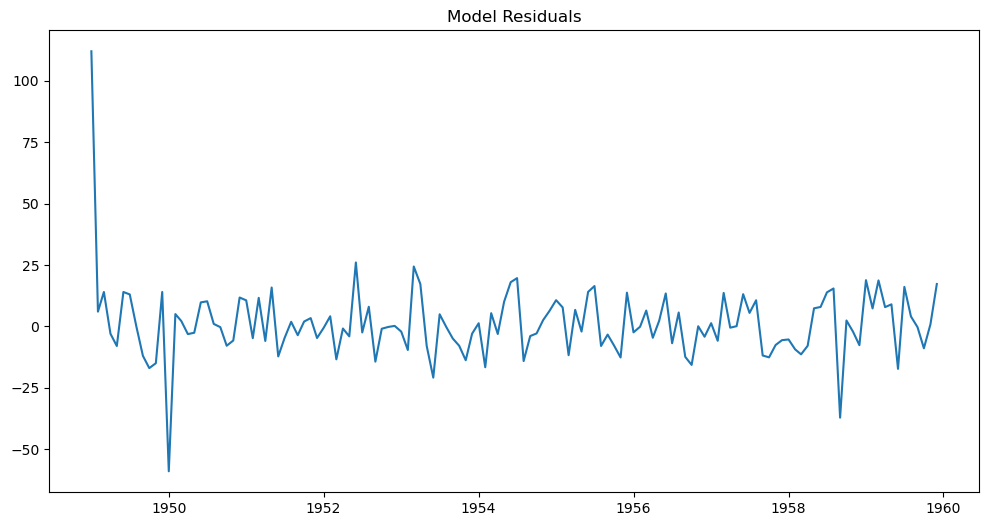

In [79]:
residuals = result.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title("Model Residuals")
plt.show()


In [80]:
forecast = result.forecast(steps=12)
print("Forecasted values:\n", forecast)


Forecasted values:
 1960-01-01    423.771221
1960-02-01    407.049577
1960-03-01    468.790660
1960-04-01    458.971138
1960-05-01    482.016436
1960-06-01    535.602522
1960-07-01    609.969538
1960-08-01    621.159333
1960-09-01    524.983518
1960-10-01    469.750987
1960-11-01    424.488846
1960-12-01    466.323826
Freq: MS, Name: predicted_mean, dtype: float64


In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse:.1f} passengers")


RMSE: 22.4 passengers


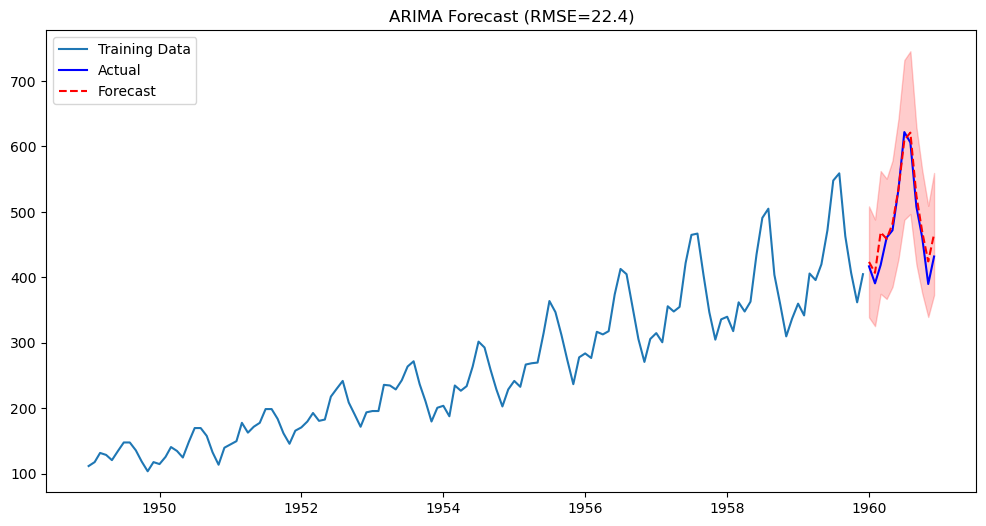

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.fill_between(test.index, forecast*0.8, forecast*1.2, alpha=0.2, color='red')
plt.title(f"ARIMA Forecast (RMSE={rmse:.1f})")
plt.legend()
plt.show()


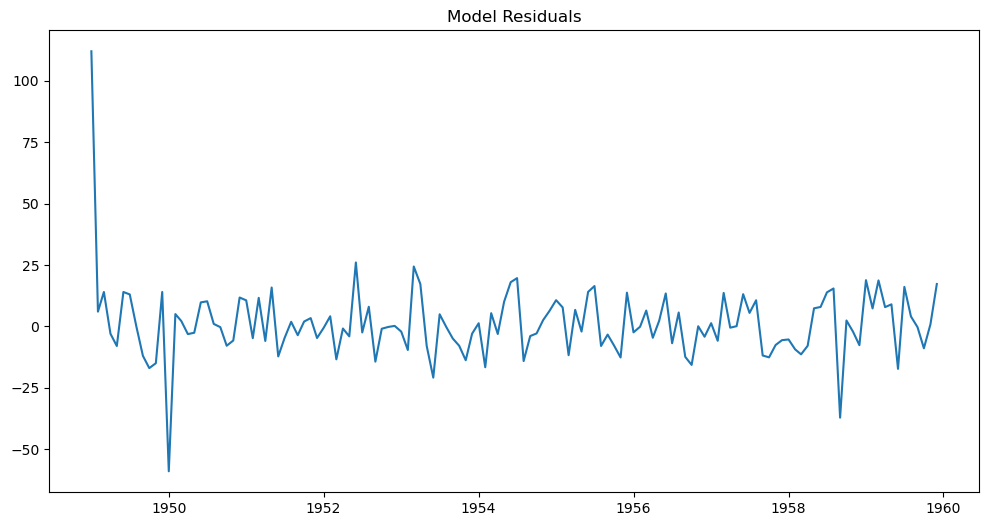

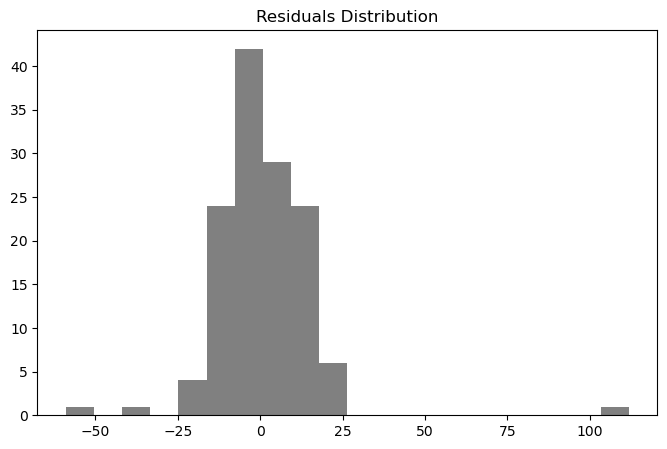

In [83]:
residuals = result.resid

plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title("Model Residuals")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=20, color='gray')
plt.title("Residuals Distribution")
plt.show()


C:\Users\Alekhya\AppData\Local\Temp\ipykernel_14744\4265655525.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=36, freq='M'), future_forecast,


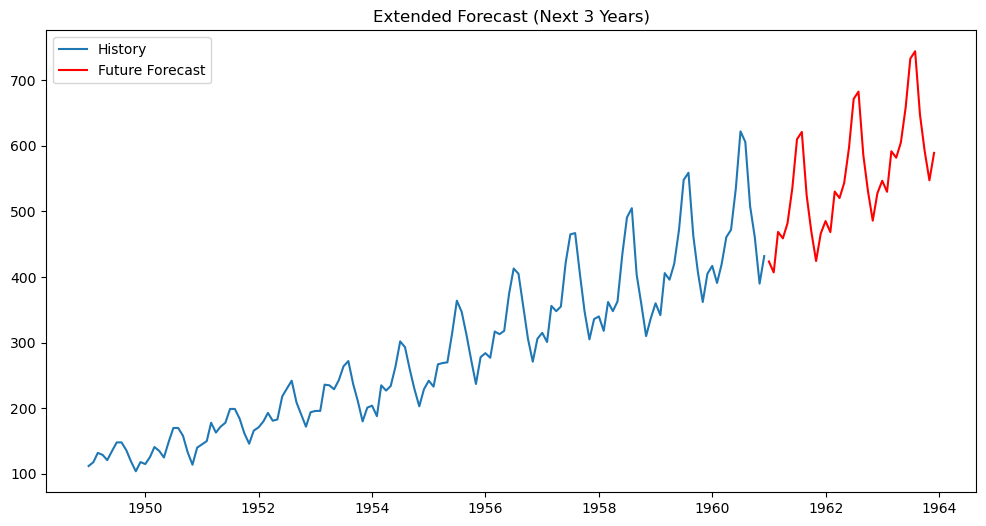

In [84]:
future_forecast = result.forecast(steps=36)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Passengers'], label="History")
plt.plot(pd.date_range(df.index[-1], periods=36, freq='M'), future_forecast, 
         label="Future Forecast", color="red")
plt.title("Extended Forecast (Next 3 Years)")
plt.legend()
plt.show()
